# Практика 5

##Библиотеки

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


### 1

In [10]:
train_football = pd.read_csv('C:\\Users\\grman\\Documents\\BigPapa\\Greg\\BigData\\DataSet\\pr5\\fifa_players.csv')

In [11]:
train_football.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [12]:
train_football.sample(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
27,K. Navas,Keylor Navas,12/15/1986,32,185.42,79.8,GK,Costa Rica,87,87,...,13,32,20,16,68,25,67,28,14,14
5738,A. Al Shehry,Abdulaziz Al Shehry,7/27/1995,23,182.88,67.1,GK,Saudi Arabia,55,62,...,10,19,13,4,28,12,39,14,13,10
1571,J. Villota,Juan Sebastián Villota Vargas,2/18/1992,27,170.18,68.9,"CAM,CM",Colombia,69,70,...,67,59,56,67,70,62,67,57,56,52
12889,Z. Majer,Žan Majer,7/25/1992,26,152.40,68.9,"CM,CAM",Slovenia,68,71,...,61,70,61,57,68,57,69,59,57,53
12407,D. Roßbach,Damian Roßbach,2/27/1993,26,187.96,83.0,"LB,CDM",Germany,68,70,...,35,60,69,53,48,48,60,63,68,64
9563,Dillson Teixeiro,Dillson Robson Teixeiro Loto,2/29/1984,35,154.94,73.9,ST,Brazil,64,64,...,54,72,38,69,53,65,65,26,36,44
7788,C. Dickinson,Carl Dickinson,3/31/1987,31,185.42,89.8,LB,England,61,61,...,44,81,62,50,52,43,58,62,61,64
7372,A. Al Amri,Abdulelah Al Amri,1/15/1997,22,185.42,73.0,CB,Saudi Arabia,60,70,...,22,47,59,29,38,45,45,58,63,60
2539,E. Babayan,Edgar Babayan,10/28/1995,23,154.94,73.0,"LM,ST",Armenia,66,72,...,58,65,52,67,62,59,61,52,55,42
8093,S. Flinders,Scott Flinders,6/12/1986,32,193.04,87.1,GK,England,62,62,...,16,28,15,11,48,23,54,13,13,15


In [13]:
train_football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [14]:
train_football.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [15]:
train_football.isna().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [16]:
replace_dict = {
    '(': '',
    '1-5': '',
    ')': ''
}
train_football.columns = train_football.columns.str.lower()
for value, key in replace_dict.items():
    train_football.columns = train_football.columns.str.replace(value, key, regex=True)

In [17]:
train_football.preferred_foot.value_counts()

Right    13781
Left      4173
Name: preferred_foot, dtype: int64

In [18]:
train_football.preferred_foot.value_counts()

Right    13781
Left      4173
Name: preferred_foot, dtype: int64

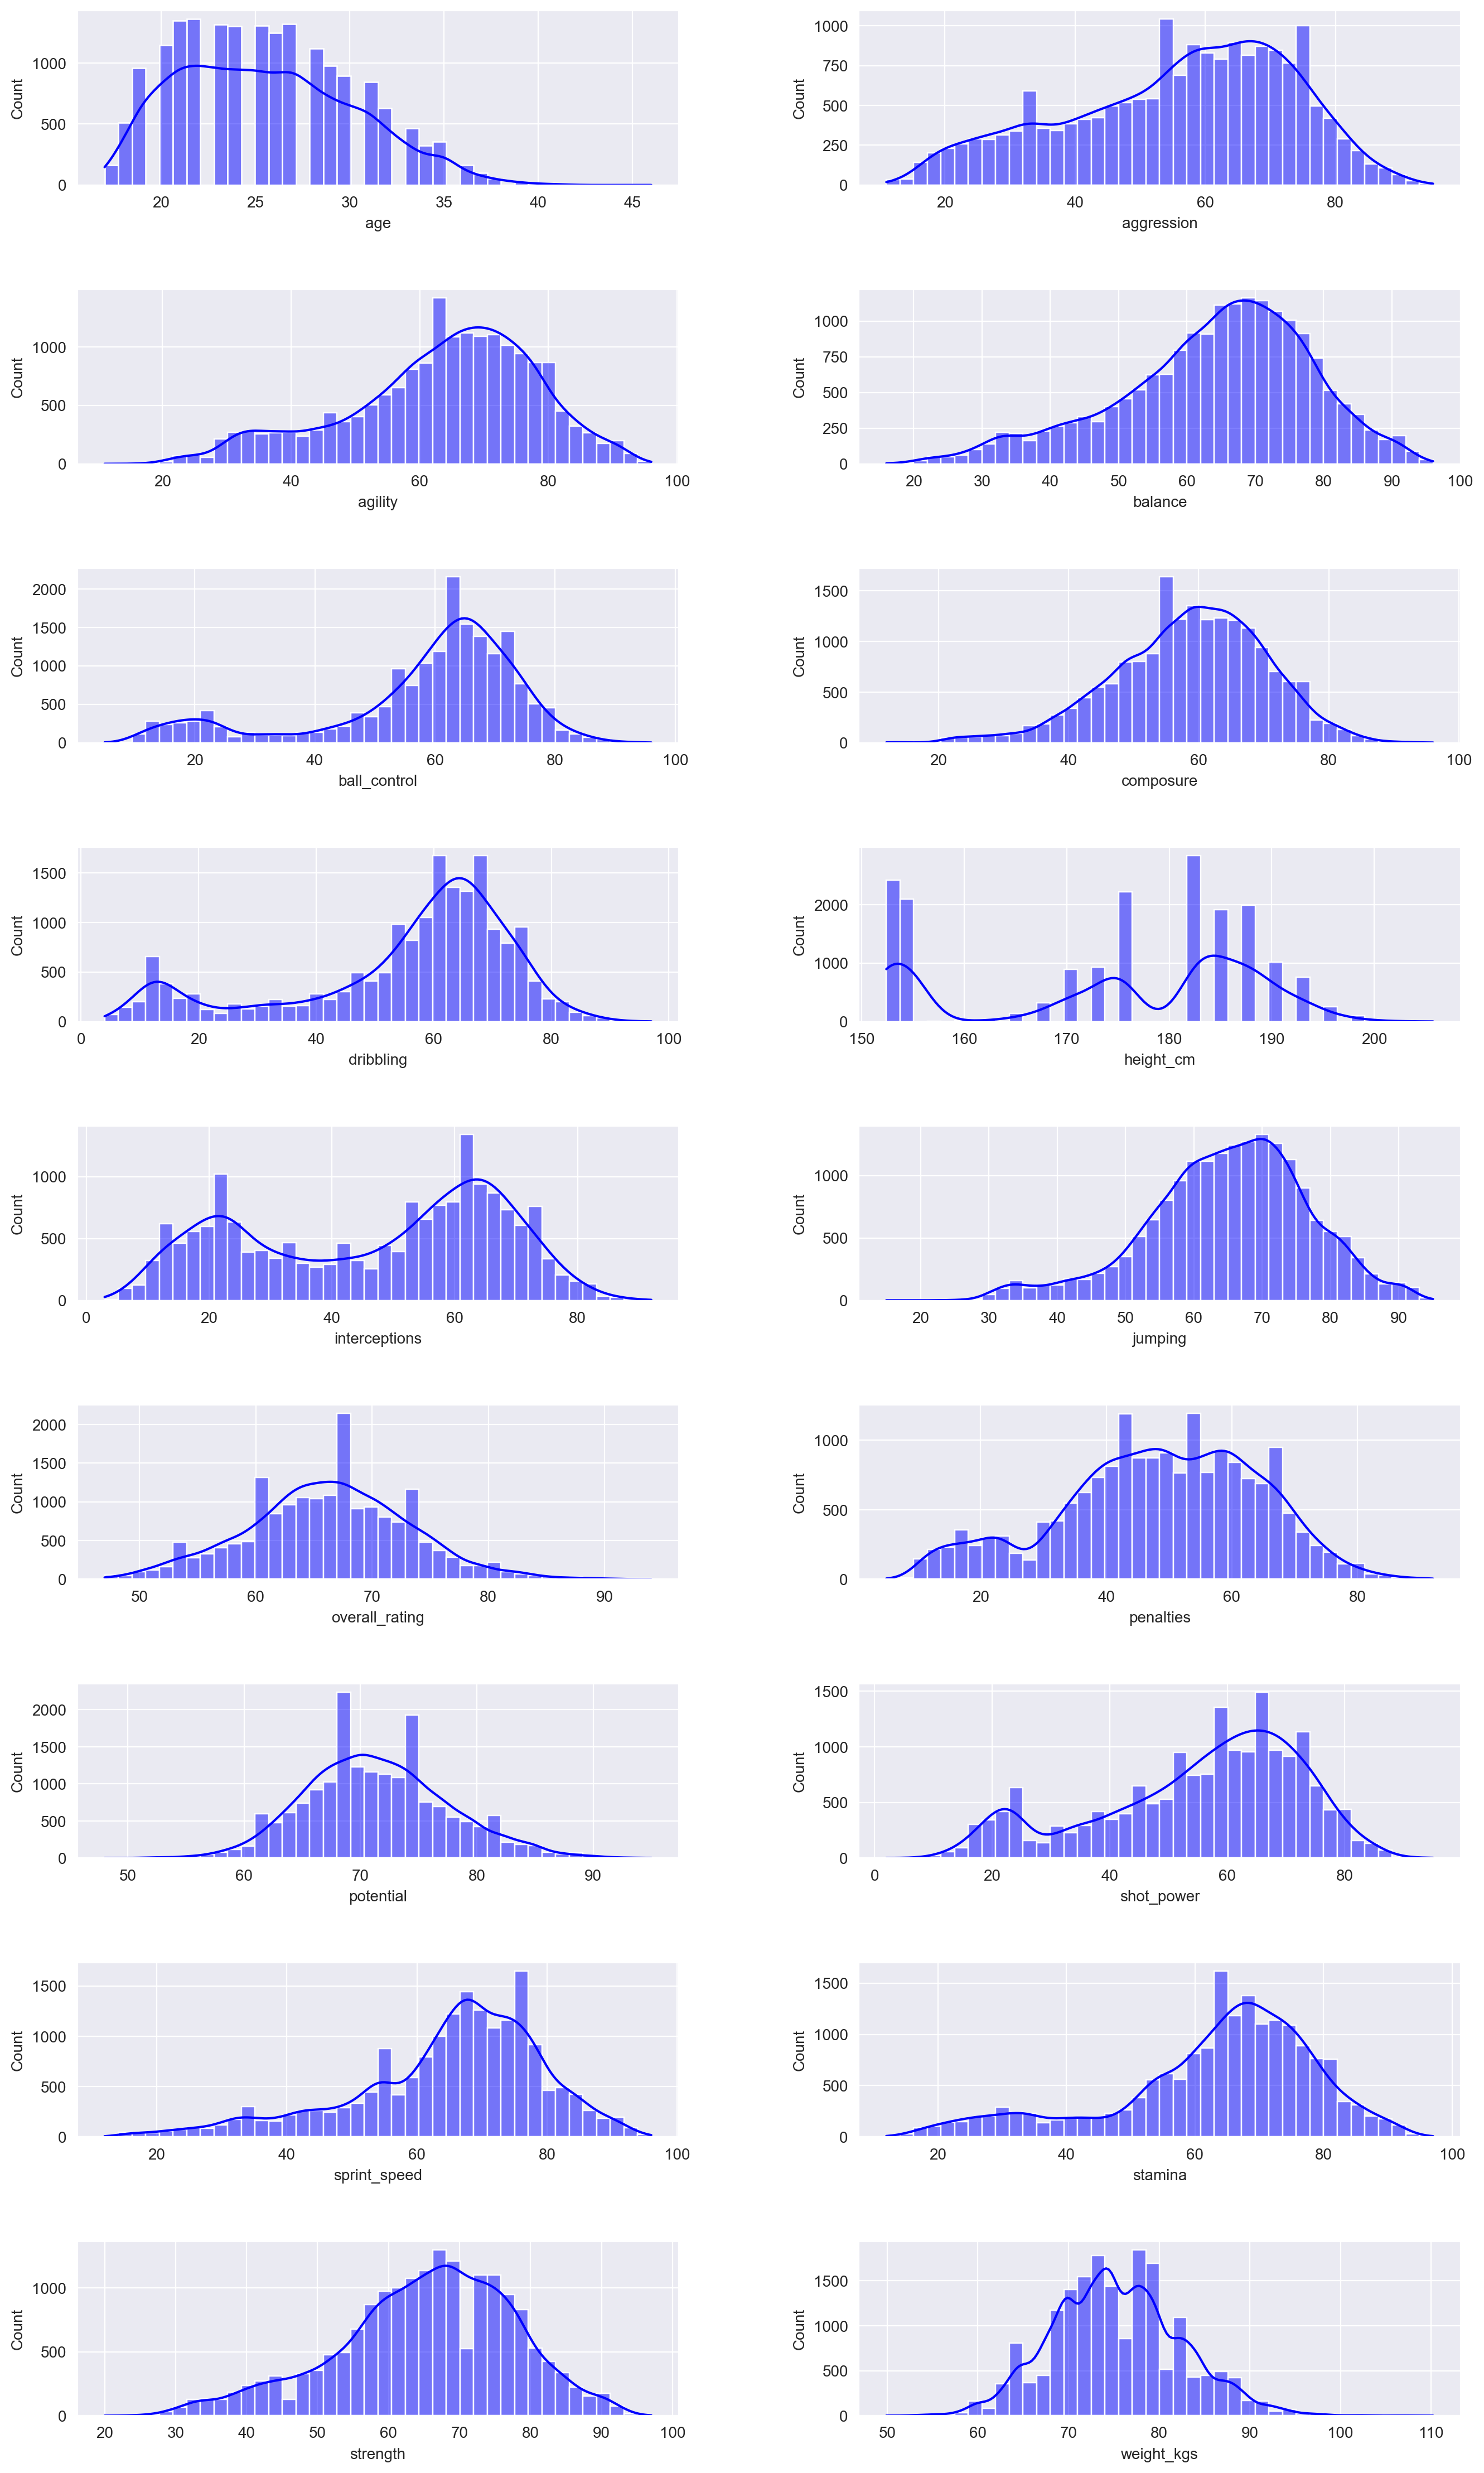

In [19]:
cols = train_football.columns.difference(['name', 'full_name', 'birth_date', 'positions', 'nationality',   'value_euro','wage_euro', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'body_type', 'release_clause_euro', 'national_team','national_rating', 'national_team_position', 'national_jersey_number','crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'curve', 'freekick_accuracy', 'long_passing','acceleration', 'reactions','long_shots', 'positioning', 'vision', 'marking', 'standing_tackle', 'sliding_tackle'])
fig, axes = plt.subplots(9, 2, figsize=(16, len(cols)+10), dpi=200)
for i, column in enumerate(cols):
    plt.subplot(9, 2, i+1)
    sns.histplot(train_football, x=column, bins=40, kde=True, color='blue')
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

In [20]:
#логарифмированные столбцы:
columns_to_log = ['agility', 'balance', 'interceptions', 'height_cm', 'shot_power', 'sprint_speed', 'weight_kgs', 'stamina']
names_log = ['logarithmic_' + x for x in columns_to_log]
train_football[names_log] = train_football[columns_to_log].apply(lambda x: np.log(x+1))

ValueError: num must be an integer with 1 <= num <= 18, not 19

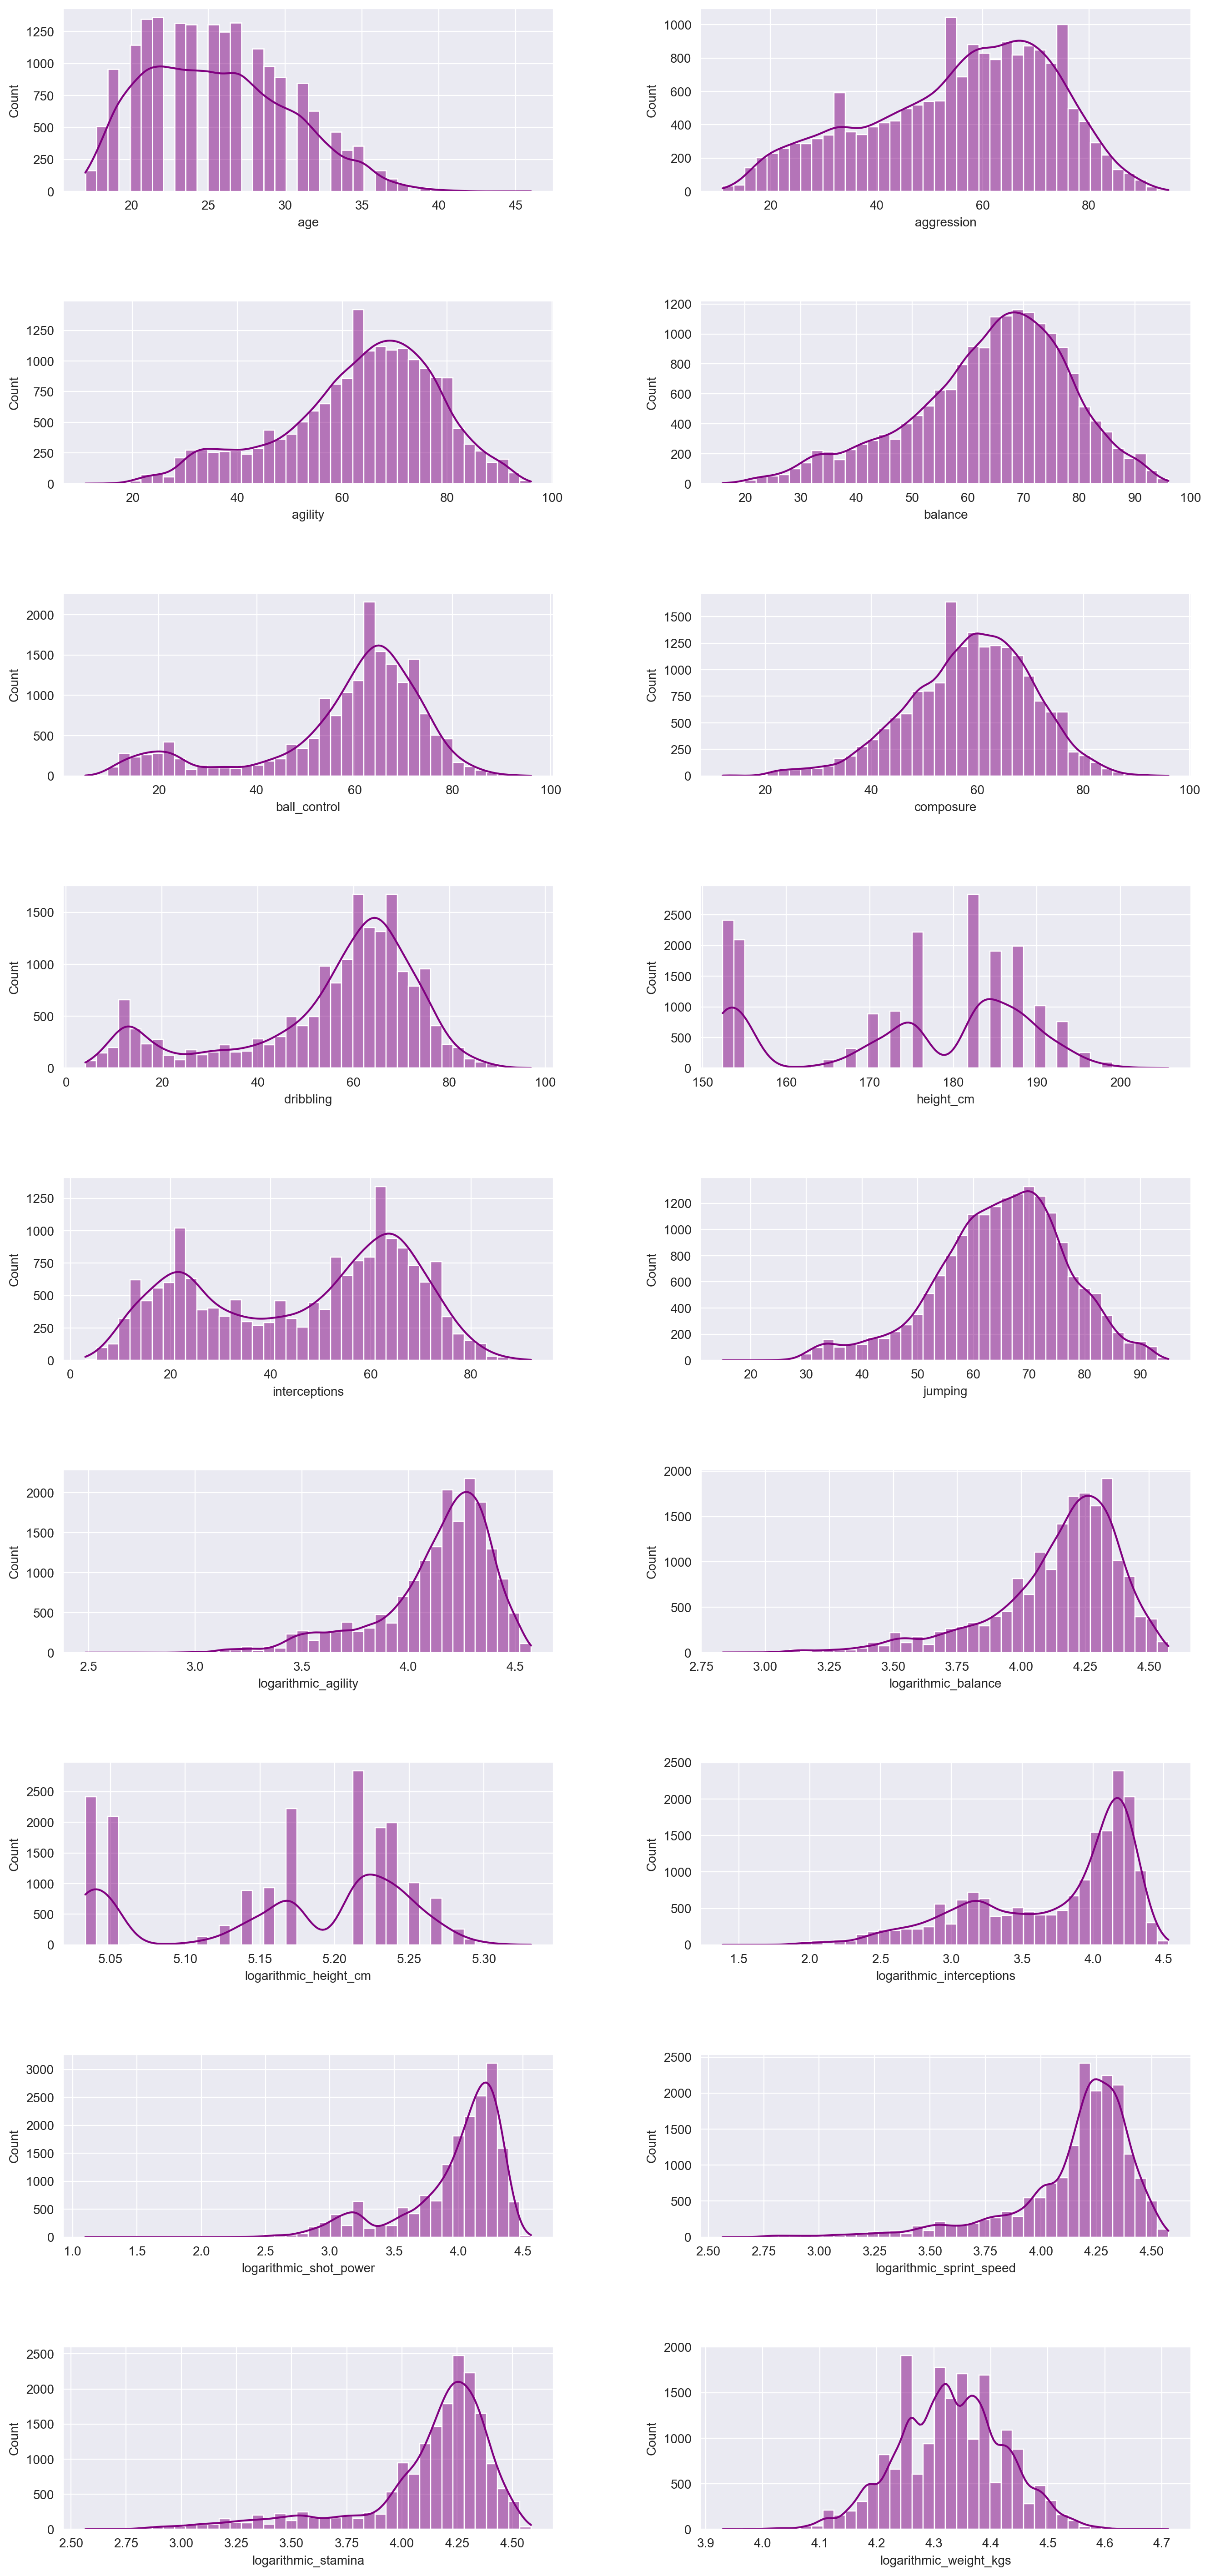

In [21]:
cols = train_football.columns.difference(['name', 'full_name', 'birth_date', 'positions', 'nationality',   'value_euro','wage_euro', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'body_type', 'release_clause_euro', 'national_team','national_rating', 'national_team_position', 'national_jersey_number','crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'curve', 'freekick_accuracy', 'long_passing','acceleration', 'reactions','long_shots', 'positioning', 'vision', 'marking', 'standing_tackle', 'sliding_tackle'])
fig, axes = plt.subplots(9, 2, figsize=(16, len(cols)+10), dpi=200)
for i, column in enumerate(cols):
    plt.subplot(9, 2, i+1)
    sns.histplot(train_football, x=column, bins=40, kde=True, color='purple')
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

In [23]:
mapping = {
    'Left': 0,
    'Right': 1,
}


def replace_tf(foot):
    return mapping.get(foot, foot)
train_football['RightFoot'] = train_football['preferred_foot'].apply(replace_tf)
train_football['RightFoot'] = train_football['RightFoot'].apply(int)


In [24]:
train_football.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,sliding_tackle,logarithmic_agility,logarithmic_balance,logarithmic_interceptions,logarithmic_height_cm,logarithmic_shot_power,logarithmic_sprint_speed,logarithmic_weight_kgs,logarithmic_stamina,RightFoot
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,26,4.543295,4.564348,3.135494,5.142716,4.454347,4.465908,4.291828,4.290459,0
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,22,4.394449,4.406719,4.043051,5.049471,4.442651,4.304065,4.346399,4.532599,1
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,67,4.343805,4.204693,4.174387,5.254888,4.510860,4.382027,4.441474,4.488636,1
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,22,4.553877,4.543295,3.295837,5.097180,4.330733,4.465908,4.094345,4.330733,1
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,87,3.931826,3.713572,4.488636,5.241535,4.025352,4.330733,4.498698,4.330733,1


### 2. Изобразить гистограмму, которая показывает баланс классов. Сделать выводы.

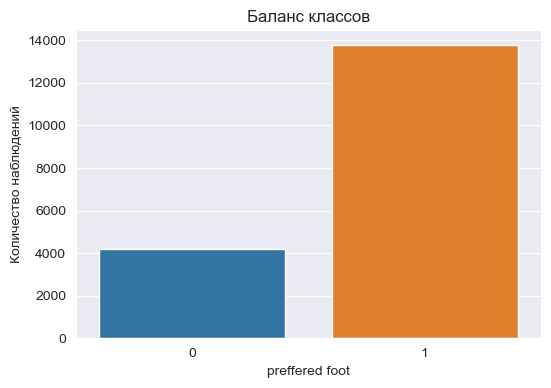

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_football, x='RightFoot')
plt.title("Баланс классов")
plt.xlabel("preffered foot")
plt.ylabel("Количество наблюдений")
plt.show()

In [26]:
train_football.dropna(inplace = True)
X = train_football.select_dtypes(include=np.number).drop(columns=['RightFoot'], axis = 1)
y = train_football['RightFoot']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.8)
print(X_train.shape)
print(y_train.shape)


(631, 50)
(631,)


In [27]:
model_l = LogisticRegression()
model_l.fit(X_train, y_train)
predicted_l = model_l.predict(X_test)

In [28]:
print('Accuracy:', accuracy_score(y_test, predicted_l))
print('Precision:', precision_score(y_test, predicted_l))
print('Recall:', recall_score(y_test, predicted_l))
print('f1-мера', f1_score(y_test, predicted_l))

Accuracy: 0.7784810126582279
Precision: 0.8026315789473685
Recall: 0.9606299212598425
f1-мера 0.8745519713261649


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

train_f = pd.read_csv('C:\\Users\\grman\\Documents\\BigPapa\\Greg\\BigData\\DataSet\\pr5\\fifa_players.csv')
mapping = {
    'Left': 0,
    'Right': 1,
}
def replace_tf(foot):
    return mapping.get(foot, foot)
train_f['RightFoot'] = train_f['preferred_foot'].apply(replace_tf)
train_f['RightFoot'] = train_f['RightFoot'].apply(int)
X = train_f.select_dtypes(include=np.number).drop(columns=['RightFoot'], axis = 1)
y = train_f['RightFoot']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.8)

params = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel': params}
model_svc = SVC()
grid_search_svm = GridSearchCV(estimator=model_svc, param_grid=parameters, cv=3)
grid_search_svm.fit(X_train, y_train)
predicted_svm = grid_search_svm(X_test)

ValueError: 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [31]:
print('Accuracy:', accuracy_score(y_test, predicted_svm))
print('Precision:', precision_score(y_test, predicted_svm))
print('Recall:', recall_score(y_test, predicted_svm))
print('f1-мера', f1_score(y_test, predicted_svm))

NameError: name 'predicted_svm' is not defined

In [14]:
numbers_of_neighbors = np.arange(5, 10)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors": numbers_of_neighbors}
grid_search = GridSearchCV(estimator = model_KNN, param_grid = params, cv=3)

NameError: name 'np' is not defined

In [15]:
grid_search.fit(X_train, y_train)

NameError: name 'grid_search' is not defined

In [16]:
grid_search.best_score_

NameError: name 'grid_search' is not defined

In [17]:
grid_search.best_estimator_

NameError: name 'grid_search' is not defined

In [18]:
predicted_knn = grid_search.predict(X_test)

NameError: name 'grid_search' is not defined

In [19]:
print(f'Accuracy: {accuracy_score(y_test, predicted_knn)}')
print(f'Precision: {precision_score(y_test, predicted_knn)}')
print(f'Recall: {recall_score(y_test, predicted_knn)}')
print(f'f1: {classification_report(predicted_knn, y_test)}')

NameError: name 'accuracy_score' is not defined